# I. Introduction
---
<br>
Fraudtotype: Aplikasi pintar pencegah potensi aktivitas penipuan<br>
Fraudtotype adalah aplikasi pintar yang dirancang untuk menganalisa dan memprediksi potensi aktivitas fraud. Dengan kombinasi analisa pola transaksi dengan teknologi machine learning, Fraudtotype membantu bisnis mengidentifikasi perilaku mencurigakan sebelum menyebabkan kerugian yang signifikan.
<br><br>
Background: Penipuan dalam transaksi digital semakin meningkat setiap tahunnya, menimbulkan kerugian besar bagi pelaku industri finansial dan e-commerce. Banyak sistem keamanan masih bersifat reaktif, bukan preventif, sehingga penipuan baru diketahui setelah kerugian terjadi. Menurut laporan KPMG Global Banking Fraud Survey, lebih dari 50% institusi keuangan global mengalami peningkatan signifikan dalam kasus penipuan digital di tahun 2019.
<br><br>
Objective:<br>
- Mendeteksi potensi terjadinya transaksi fraud<br>
- Mengidentifikasi pola transaksi mencurigakan dengan machine learning
Target User:<br>
- Bank 
- E-commerce
- Perusahaan kartu kredit
- Perusahaan asuransi

# II. Import Libraries
---

In [80]:
# Import libraries
import pandas as pd
import numpy as np
import joblib
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import LocalOutlierFactor
from category_encoders import TargetEncoder
from imblearn.under_sampling import RandomUnderSampler

# ignore warnings
warnings.filterwarnings("ignore")

# III. Data Loading
---

In [87]:
# Import dataset
df = pd.read_csv('DatosPrueba.csv', delimiter=';')
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,"45,0",Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,"46,2306","-112,1138",1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,"47,034331","-112,561071",0
1,2019-01-01 00:06:23,4642894980163,fraud_Rutherford-Mertz,grocery_pos,"24,74",Eddie,Mendez,M,1831 Faith View Suite 653,Clarinda,...,"40,7491","-95,038",7297,IT trainer,1990-07-13,d71c95ab6b7356dd74389d41df429c87,1325376383,"40,275891","-96,011548",0
2,2019-01-01 00:21:32,4334230547694630,fraud_Bruen-Yost,misc_pos,"6,85",Scott,Martin,M,7483 Navarro Flats,Freedom,...,"43,0172","-111,0292",471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,1325377292,"43,753735","-111,454923",0
3,2019-01-01 00:22:44,630412733309,fraud_Torphy-Goyette,shopping_pos,"66,21",Heather,Stanton,F,445 Jerry Lights Apt. 081,Republic,...,"46,368","-87,9938",1038,Armed forces training and education officer,1964-04-22,20f048d3907dbb9978e23bee7b7578ce,1325377364,"46,412038","-88,516663",0
4,2019-01-01 00:23:58,374125201044065,"fraud_Bahringer, Schoen and Corkery",shopping_pos,"9,03",Christopher,Gilbert,M,20937 Reed Lakes Apt. 271,Washington,...,"38,9757","-77,0282",601723,"Optician, dispensing",1970-07-20,c733711c521c41c578f4a964d8350df0,1325377438,"38,880898","-76,44111600000002",0


In [29]:
# Cek informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200881 entries, 0 to 200880
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   trans_date_trans_time  200881 non-null  object
 1   cc_num                 200881 non-null  int64 
 2   merchant               200881 non-null  object
 3   category               200881 non-null  object
 4   amt                    200881 non-null  object
 5   first                  200881 non-null  object
 6   last                   200881 non-null  object
 7   gender                 200881 non-null  object
 8   street                 200881 non-null  object
 9   city                   200881 non-null  object
 10  state                  200881 non-null  object
 11  zip                    200881 non-null  int64 
 12  lat                    200881 non-null  object
 13  long                   200881 non-null  object
 14  city_pop               200881 non-null  int64 
 15  

In [88]:
# Replace koma dengan titik dan convert ke float
df['amt'] = df['amt'].str.replace(',', '.').astype(float)
df['lat'] = df['lat'].str.replace(',', '.').astype(float)
df['long'] = df['long'].str.replace(',', '.').astype(float)
df['merch_lat'] = df['merch_lat'].str.replace(',', '.').astype(float)
df['merch_long'] = df['merch_long'].str.replace(',', '.').astype(float)

In [30]:
# Cek missing values
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

No missing values

In [31]:
# Cek data duplikat
df.duplicated().sum()

0

No data duplicates

In [32]:
# Cek deskripsi data
df.describe()

,cc_num,zip,city_pop,unix_time,is_fraud
count,2.008810e+05,200881.000000,2.008810e+05,2.008810e+05,200881.000000
mean,4.156141e+17,48826.911331,8.920038e+04,1.349255e+09,0.037365
std,1.306632e+18,26914.330746,3.019086e+05,1.287819e+07,0.189656
min,6.041621e+10,1257.000000,2.300000e+01,1.325376e+09,0.000000
25%,1.800429e+14,26237.000000,7.430000e+02,1.338724e+09,0.000000
50%,3.521417e+15,48174.000000,2.456000e+03,1.349299e+09,0.000000
75%,4.642255e+15,72042.000000,2.032800e+04,1.359589e+09,0.000000
max,4.992346e+18,99783.000000,2.906700e+06,1.371817e+09,1.000000


In [ ]:
# Save ke csv baru
df = df.to_csv('Finpro_data_clean.csv', index=False)

# III. Exploratory Data Analysis
---

## III. A. Correlation Matrix

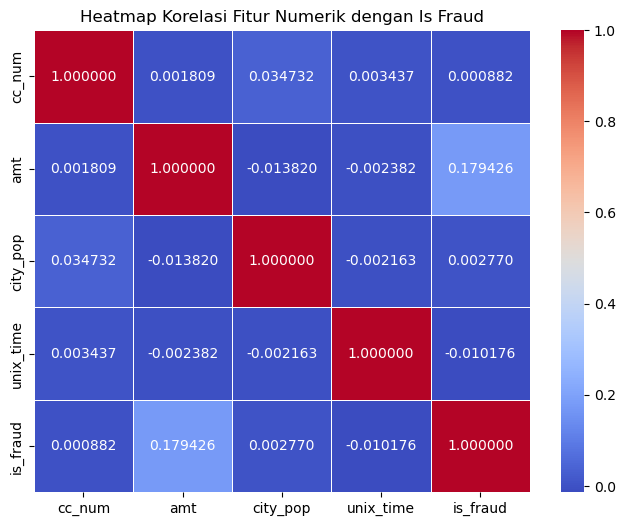

In [33]:
# Pilih kolom numerik + target
num_cols = ['cc_num', 'amt', 'city_pop', 'unix_time']

# Ubah kolom 'is_fraud' menjadi numerik
for col in num_cols:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

# Bikin correlation matrix
corr_matrix = df[num_cols + ['is_fraud']].corr(method='kendall')

# Visualisasi semua korelasi dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".6f", linewidths=0.5)
plt.title('Heatmap Korelasi Fitur Numerik dengan Is Fraud')
plt.show()

### Insight dari Heatmap Korelasi

Berdasarkan heatmap korelasi diatas, berikut ada beberapa insight yang dapat diambil:

1. **Korelasi antara `cc_num` (No. Kartu Kredit) dan `is_fraud`**:
    - Nilai korelasi sebesar **0.000882**, yang menunjukkan bahwa hubungan antara nomor kartu kredit (`cc_num`) dan target (`is_fraud`) sangat lemah atau hampir tidak ada korelasi.

2. **Korelasi antara `amt` (Jumlah Transaksi) dan `is_fraud`**:
    - Nilai korelasi sebesar **0.179426**, yang menunjukkan adanya korelasi positif lemah. Artinya, semakin besar jumlah transaksi, kemungkinan terjadinya fraud sedikit meningkat.

3. **Korelasi antara `city_pop` (Populasi Kota) dan `is_fraud`**:
    - Nilai korelasi sebesar **0.002770**, yang menunjukkan hubungan yang sangat lemah antara populasi kota dan kejadian fraud.

4. **Korelasi antara `unix_time` (Waktu Transaksi) dan `is_fraud`**:
    - Nilai korelasi sebesar **-0.010176**, yang menunjukkan hubungan negatif yang sangat lemah. Artinya, waktu transaksi hampir tidak memengaruhi kejadian fraud.

In [34]:
# Fungsi Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k)-1)))

# cat columns merupakan kolom yang bukan anggota num_cols
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Hitung Cramer's V untuk setiap kolom kategorikal terhadap target
cramers_result = {}
for col in cat_cols:
    cramers_result[col] = cramers_v(df[col], df['is_fraud'])

# Ubah jadi DataFrame biar rapi
cramers_df = pd.DataFrame.from_dict(cramers_result, orient='index', columns=['Cramer\'s V']).sort_values(by="Cramer's V", ascending=False)
print(cramers_df)

                       Cramer's V
trans_num                1.000000
trans_date_trans_time    0.998788
merch_long               0.998580
merch_lat                0.997124
street                   0.350966
dob                      0.347899
lat                      0.346786
long                     0.346728
city                     0.318049
job                      0.208270
last                     0.196292
first                    0.181021
merchant                 0.180191
category                 0.173989
state                    0.051480
gender                   0.019010


### Insight dari Tabel Kategori

Berdasarkan tabel kategori di atas, berikut adalah beberapa insight yang dapat diambil:

1. **Kolom `trans_num`**:
    - Memiliki nilai **Cramer's V sebesar 1.0**, yang menunjukkan korelasi yang sangat tinggi dengan target (`is_fraud`). Hal ini mengindikasikan bahwa setiap transaksi memiliki nomor unik yang dapat secara langsung mengidentifikasi kejadian fraud.

2. **Kolom `trans_date_trans_time`**:
    - Memiliki nilai **Cramer's V sebesar 0.9988**, yang juga menunjukkan korelasi yang sangat tinggi dengan target. Waktu transaksi dapat menjadi indikator penting dalam mendeteksi pola fraud.

3. **Kolom `street` dan `dob`**:
    - Memiliki nilai **Cramer's V masing-masing sebesar 0.3510 dan 0.3479**, yang menunjukkan korelasi sedang dengan target. Informasi alamat dan tanggal lahir mungkin memberikan petunjuk tambahan terkait pola fraud.

4. **Kolom `merchant` dan `category`**:
    - Memiliki nilai **Cramer's V sebesar 0.1802 dan 0.1740**, yang menunjukkan korelasi lemah dengan target. Namun, kategori produk dan merchant tertentu mungkin lebih rentan terhadap kejadian fraud.

5. **Kolom `gender` dan `state`**:
    - Memiliki nilai **Cramer's V sebesar 0.0190 dan 0.0515**, yang menunjukkan korelasi yang sangat lemah dengan target. Hal ini mengindikasikan bahwa jenis kelamin dan lokasi negara bagian tidak terlalu berpengaruh terhadap kejadian fraud.

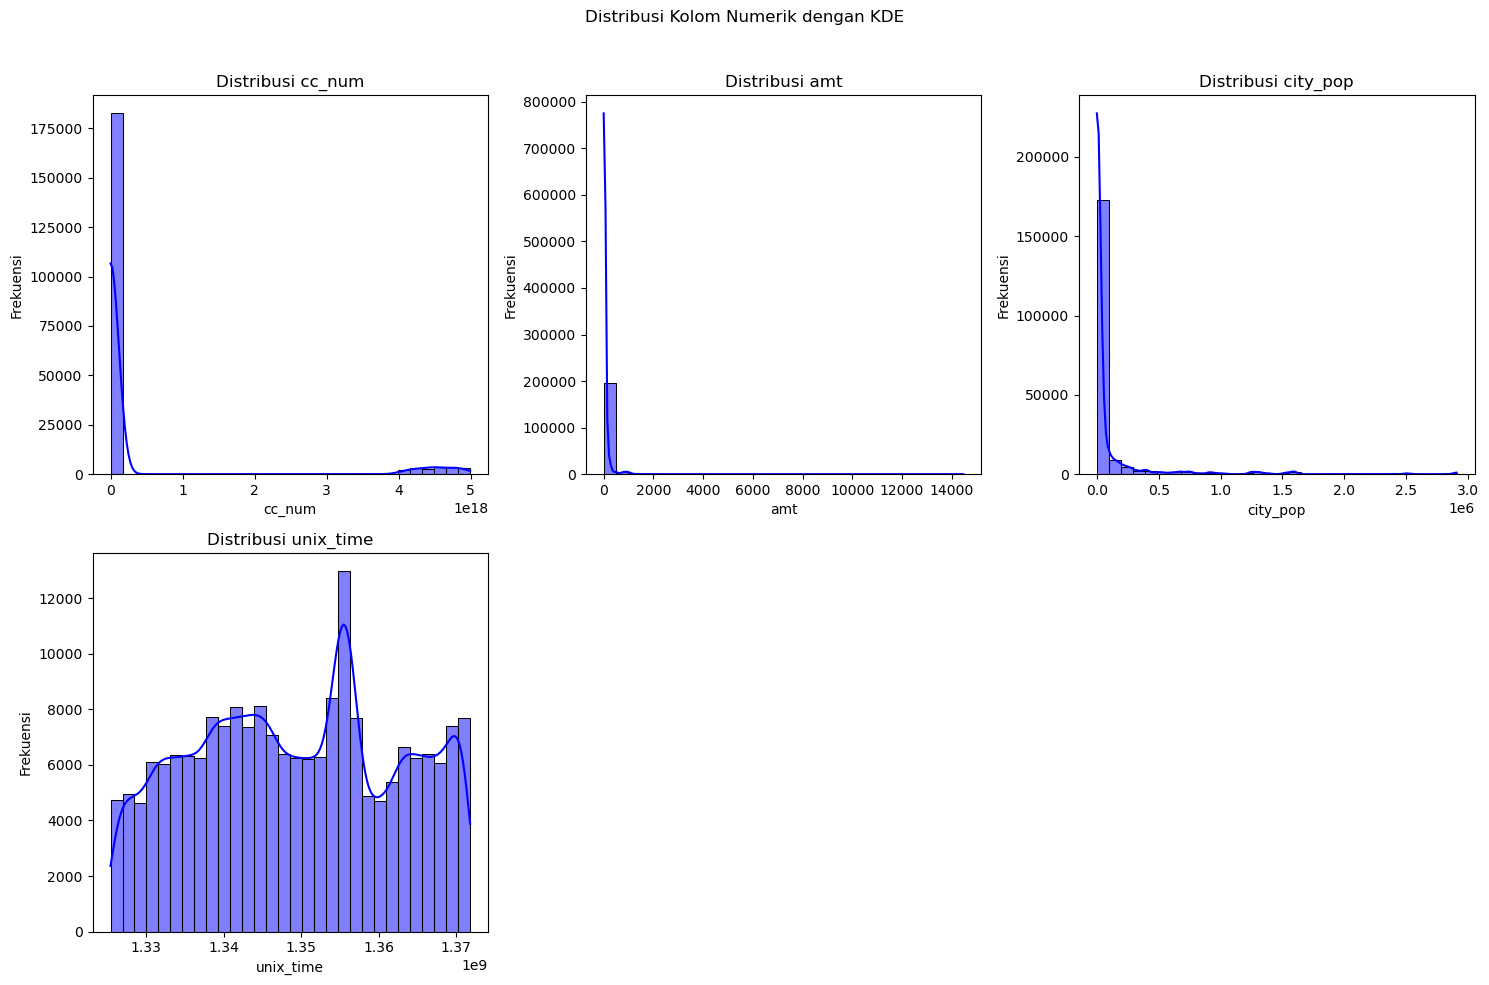

In [35]:
# Plot histogram dengan KDE untuk melihat skewness
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
plt.suptitle("Distribusi Kolom Numerik dengan KDE")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Insight dari Distribusi Data

Berdasarkan distribusi data yang diberikan, berikut adalah beberapa insight yang dapat diambil:

1. **Kolom `cc_num` (Nomor Kartu Kredit)**:
    - Distribusi sangat jarang dan tidak berarti untuk analisis numerik. Bisa di drop untuk EDA.

2. **Kolom `amt` (Jumlah Transaksi)**:
    - Distribusi sangat skewed ke kanan (positively skewed). Mayoritas transaksi bernilai kecil, dengan sedikit sekali outlier bernilai besar (> 2000).

3. **Kolom `city_pop` (Populasi Kota)**:
    - Distribusi sangat skewed ke kanan (positively skewed). Hanya sedikit transaksi dari kota besar (> 1 juta).

4. **Kolom `unix_time` (Waktu Transaksi)**:
    - Distribusi relatif merata dengan dan terlihat adanya pola musiman.

## III. B. Distribusi Fraud dan Non-Fraud

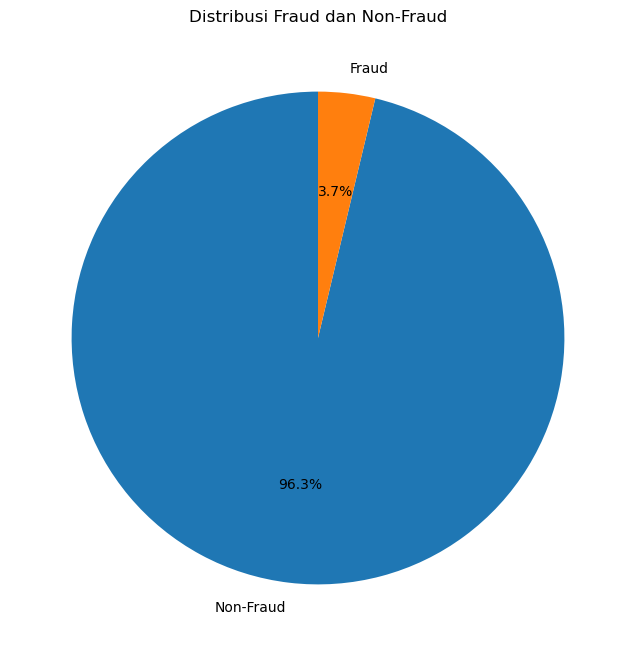

In [36]:
# Hitung distribusi fraud dan non-fraud
fraud_counts = df['is_fraud'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
fraud_counts.plot.pie(autopct='%1.1f%%', startangle=90, labels=['Non-Fraud', 'Fraud'])
plt.title('Distribusi Fraud dan Non-Fraud')
plt.ylabel('')  # Hilangkan label y
plt.show()

## III. C. Kategori Dengan Jumlah Fraud Terbanyak

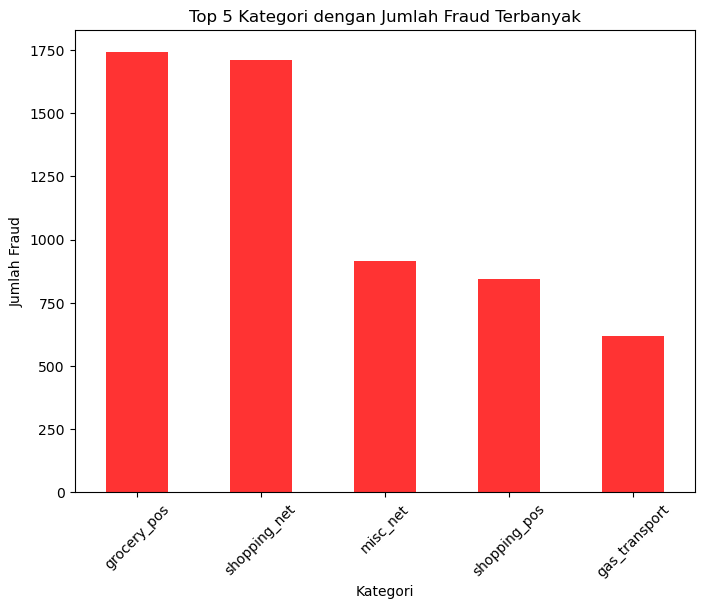

In [37]:
# Top 5 kategori dengan jumlah fraud terbanyak
top_5_categories = df[df['is_fraud'] == 1]['category'].value_counts().head(5)

# Plot the chart
plt.figure(figsize=(8, 6))
top_5_categories.plot(kind='bar', color='red', alpha=0.8)
plt.title('Top 5 Kategori dengan Jumlah Fraud Terbanyak')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Fraud')
plt.xticks(rotation=45)
plt.show()

## III. D. Jam Paling Rentan Terhadap Fraud

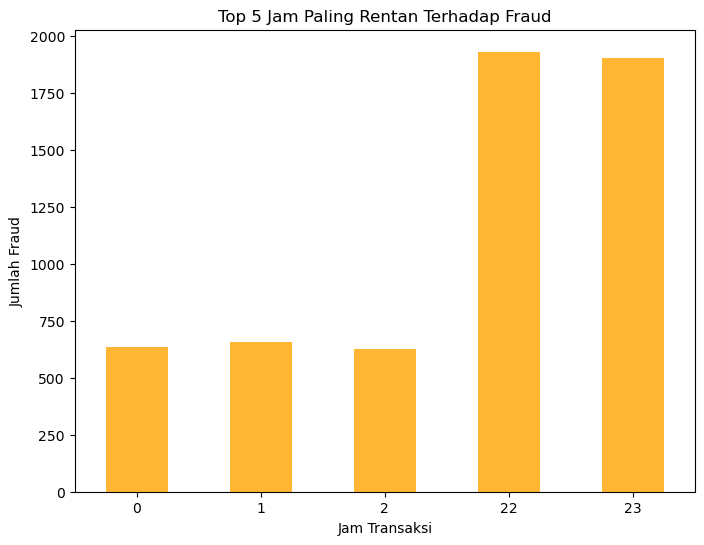

In [46]:
# Grup top 5 jam
top_5_hours = df[df['is_fraud'] == 1]['trans_hour'].value_counts().head(5)

# Plot the top 5 hours
plt.figure(figsize=(8, 6))
top_5_hours.sort_index().plot(kind='bar', color='orange', alpha=0.8)
plt.title('Top 5 Jam Paling Rentan Terhadap Fraud')
plt.xlabel('Jam Transaksi')
plt.ylabel('Jumlah Fraud')
plt.xticks(rotation=0)
plt.show()

## III. E. Jumlah Fraud berdasarkan Gender dan Usia

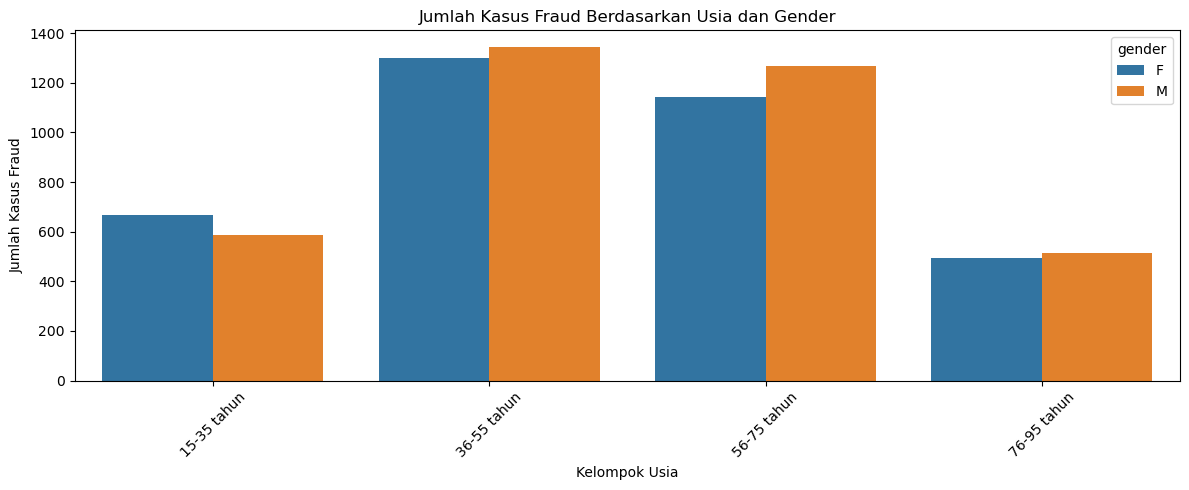

In [47]:
# Hitung usia dari kolom 'dob'
df['dob'] = pd.to_datetime(df['dob'])
current_year = pd.Timestamp.now().year
df['age'] = current_year - df['dob'].dt.year

# Kelompokkan usia ke dalam rentang
bins = [15, 35, 55, 75, 95]
labels = ['15-35 tahun', '36-55 tahun', '56-75 tahun', '76-95 tahun']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Filter hanya kasus fraud
fraud_df = df[df['is_fraud'] == 1]

# Hitung jumlah fraud berdasarkan gender dan rentang usia
fraud_grouped = fraud_df.groupby(['age_group', 'gender']).size().reset_index(name='count')

# Plot grouped bar chart
plt.figure(figsize=(12, 5))
sns.barplot(x='age_group', y='count', hue='gender', data=fraud_grouped)

plt.title('Jumlah Kasus Fraud Berdasarkan Usia dan Gender')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Kasus Fraud')
plt.xticks(rotation=45)
plt.legend(title='gender')
plt.tight_layout()
plt.show()

## III. F. Distribusi Jumlah Transaksi pada Kasus Fraud

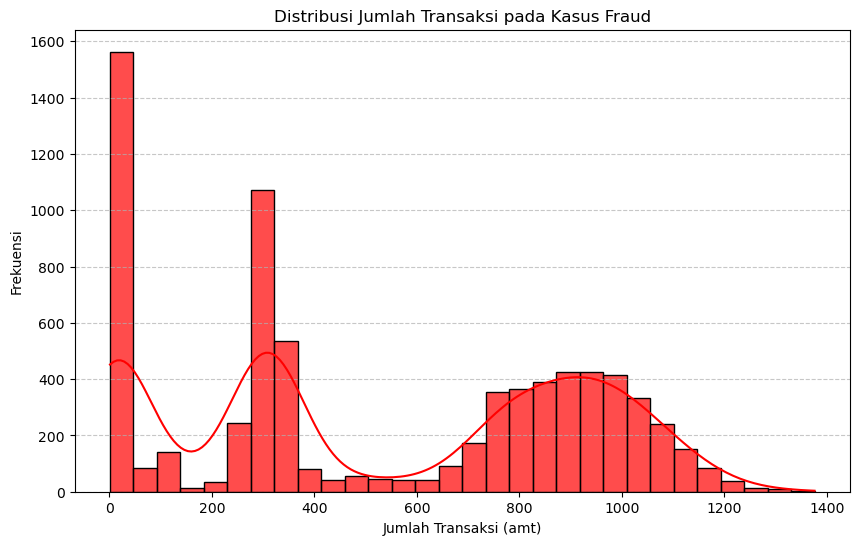

In [48]:
# Visualisasi distribusi jumlah transaksi pada kasus fraud
plt.figure(figsize=(10, 6))
sns.histplot(fraud_df['amt'], kde=True, bins=30, color='red', alpha=0.7)
plt.title('Distribusi Jumlah Transaksi pada Kasus Fraud')
plt.xlabel('Jumlah Transaksi (amt)')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## III. G. States dengan Jumlah Fraud Terbanyak

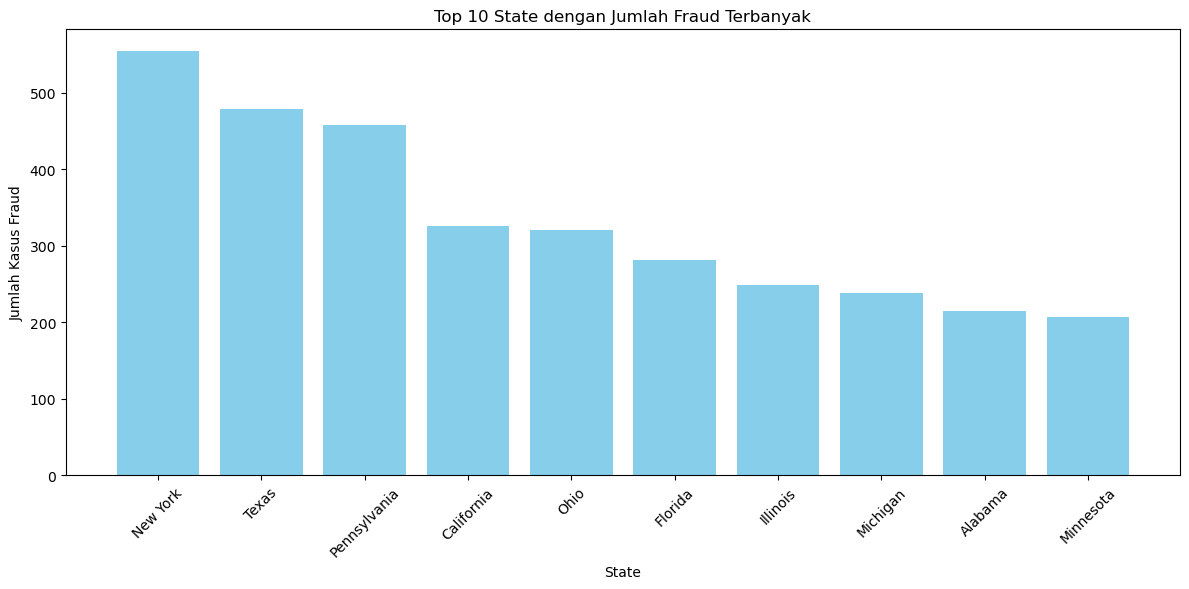

In [49]:
# Mapping kode state ke nama lengkap
us_state_names = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'DC': 'District of Columbia',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois',
    'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana',
    'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota',
    'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
    'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon',
    'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota',
    'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia',
    'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

# Hitung top 10 state dengan fraud terbanyak
top_10_states = df[df['is_fraud'] == 1].groupby('state').size().sort_values(ascending=False).head(10)
top_10_df = top_10_states.reset_index(name='Jumlah Kasus Fraud')
top_10_df['State'] = top_10_df['state'].map(us_state_names)

# Plot barchart menggunakan matplotlib.pyplot
plt.figure(figsize=(12, 6))
plt.bar(top_10_df['State'], top_10_df['Jumlah Kasus Fraud'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Jumlah Kasus Fraud')
plt.title('Top 10 State dengan Jumlah Fraud Terbanyak')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# IV. Feature Engineering
---

## IV. A. Data Loading

In [52]:
# Ubah amt menjadi float
df['amt'] = df['amt'].str.replace(',', '.').astype(float)

In [53]:
# Convert trans_date_trans_time to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Create a new column trans_hour
df['trans_hour'] = df['trans_date_trans_time'].dt.hour

In [54]:
# Convert dob to datetime
df['dob'] = pd.to_datetime(df['dob'])
latest_date = df['trans_date_trans_time'].max()

# Calculate age using the latest_date
df['age'] = (latest_date - df['dob']).dt.days // 365

In [55]:
# Select specific columns for feature selection
selected_features = df[['trans_hour', 'category', 'state', 'amt', 'age', 'is_fraud']].copy()
selected_features.head()

,trans_hour,category,state,amt,age,is_fraud
0,0,gas_transport,MT,45.00,53,0
1,0,grocery_pos,IA,24.74,29,0
2,0,misc_pos,WY,6.85,52,0
3,0,shopping_pos,MI,66.21,56,0
4,0,shopping_pos,DC,9.03,49,0


In [56]:
# Hitung nilai skew untuk kolom numerik
numeric_skew = selected_features.select_dtypes(include=['int32', 'float64', 'int64']).skew()

# Tampilkan hasil
print(numeric_skew)

trans_hour    -0.278868
amt           14.377982
age            0.599278
is_fraud       4.878719
dtype: float64


Nilai skewness menunjukkan simetri distribusi data. Berikut penjelasan untuk masing-masing nilai skewness:

1. **`trans_hour` (-0.278868)**:
    - Nilai skewness negatif kecil menunjukkan distribusi yang hampir simetris, tetapi sedikit condong ke kiri (left-skewed). Artinya, sebagian besar transaksi terjadi pada jam tertentu, dengan sedikit transaksi di luar jam tersebut.

2. **`amt` (14.377982)**:
    - Nilai skewness positif besar menunjukkan distribusi yang sangat skewed ke kanan (right-skewed). Artinya, sebagian besar transaksi memiliki jumlah kecil, tetapi ada beberapa transaksi dengan jumlah yang sangat besar (outlier).

3. **`age` (0.599278)**:
    - Nilai skewness positif kecil menunjukkan distribusi yang sedikit skewed ke kanan. Artinya, sebagian besar usia pengguna berada di rentang tertentu, dengan beberapa pengguna yang lebih tua.

4. **`is_fraud` (4.878719)**:
    - Nilai skewness positif besar menunjukkan distribusi yang sangat skewed ke kanan. Artinya, sebagian besar data adalah non-fraud, dengan hanya sedikit kasus fraud (ketidakseimbangan data).

In [57]:
# Hitung nilai korelasi trans_hour dengan is_fraud menggunakan metode Pearson
correlation_trans_hour_is_fraud = selected_features['trans_hour'].corr(selected_features['is_fraud'], method='pearson')

# Tampilkan hasil
print("Korelasi trans_hour dengan is_fraud (Pearson):", correlation_trans_hour_is_fraud)


Korelasi trans_hour dengan is_fraud (Pearson): 0.034020052108609214


In [58]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# Hitung Cramér's V untuk kolom 'category'
category_contingency = pd.crosstab(selected_features['category'], selected_features['is_fraud'])
cramers_v_category = cramers_v(category_contingency.values)

# Hitung Cramér's V untuk kolom 'state'
state_contingency = pd.crosstab(selected_features['state'], selected_features['is_fraud'])
cramers_v_state = cramers_v(state_contingency.values)

print("Cramér's V untuk category:", cramers_v_category)
print("Cramér's V untuk state:", cramers_v_state)

Cramér's V untuk category: 0.17398875718130805
Cramér's V untuk state: 0.051479892475386146


## IV. B. Data Splitting

In [59]:
# Split the data into features and target
X = selected_features.drop(columns=['is_fraud'])
y = selected_features['is_fraud']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("Class distribution:", y_train.value_counts())

Class distribution: is_fraud
0    135362
1      5254
Name: count, dtype: int64


In [60]:
# Perform undersampling on the training set
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Display the class distribution after undersampling
print("Class distribution after undersampling:", y_train_resampled.value_counts())

Class distribution after undersampling: is_fraud
0    5254
1    5254
Name: count, dtype: int64


In [61]:
# Encode the 'category' column in the training set
categorical_transformer = TargetEncoder()
X_train['category'] = categorical_transformer.fit_transform(X_train['category'], y_train)
X_train['state'] = categorical_transformer.fit_transform(X_train['state'], y_train)
X_test['category'] = categorical_transformer.fit_transform(X_test['category'], y_test)
X_test['state'] = categorical_transformer.fit_transform(X_test['state'], y_test)

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.04)
y_pred = clf.fit_predict(X_train)

In [62]:
y_pred_new = []

for i in y_pred:
    if i == -1:
        y_pred_new.append(1)
    else:
        y_pred_new.append(0)
        
# Ambil indeks dari X_train
index_X_train = X_train.index

# Gabungkan indeks dengan y_pred
result = pd.DataFrame({'Index': index_X_train, 'Prediction': y_pred_new})

result.set_index('Index', inplace=True)
result.head()
result.value_counts()

Prediction
0             134991
1               5625
Name: count, dtype: int64

In [63]:
# Generate classification reports
train_report = classification_report(y_train, y_pred_new)

print("Classification Report - Train Data")
print(train_report)

Classification Report - Train Data
              precision    recall  f1-score   support

           0       0.97      0.96      0.96    135362
           1       0.12      0.13      0.12      5254

    accuracy                           0.93    140616
   macro avg       0.54      0.55      0.54    140616
weighted avg       0.93      0.93      0.93    140616



In [64]:
# Create an Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.04, random_state=42)

# Fit the model on the training data
iso_forest.fit(X_train)

# Predict anomalies (-1 for anomalies, 1 for normal points)
y_pred_iso = iso_forest.predict(X_train)
y_pred_iso_test = iso_forest.predict(X_test)

# Convert predictions to binary format (1 for anomalies, 0 for normal points)
y_pred_iso_binary = [1 if pred == -1 else 0 for pred in y_pred_iso]
y_pred_iso_binary_test = [1 if pred == -1 else 0 for pred in y_pred_iso_test]

# Create a DataFrame to store the results
iso_result = pd.DataFrame({'Index': X_train.index, 'Prediction': y_pred_iso_binary})
iso_result.set_index('Index', inplace=True)

# Display the value counts of predictions
iso_result.value_counts()

Prediction
0             134991
1               5625
Name: count, dtype: int64

In [65]:
# Generate classification reports
train_report_iso = classification_report(y_train, y_pred_iso_binary)
test_report_iso = classification_report(y_test, y_pred_iso_binary_test)

print("Classification Report - Train Data")
print(train_report_iso)

print("\nClassification Report - Test Data")
print(test_report_iso)

Classification Report - Train Data
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    135362
           1       0.51      0.55      0.53      5254

    accuracy                           0.96    140616
   macro avg       0.75      0.76      0.75    140616
weighted avg       0.96      0.96      0.96    140616


Classification Report - Test Data
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     58013
           1       0.50      0.59      0.54      2252

    accuracy                           0.96     60265
   macro avg       0.74      0.78      0.76     60265
weighted avg       0.97      0.96      0.96     60265



## IV. C. Feature Selection

In [66]:
# Pisahkan fitur numerik dan kategorik
num_cols = X.select_dtypes(include=['int32', 'float64', 'int64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

print("Fitur numerik:", num_cols)
print("Fitur kategorik:", cat_cols)

Fitur numerik: ['trans_hour', 'amt', 'age']
Fitur kategorik: ['category', 'state']


## IV. D. Data Preprocessing

In [67]:
# Define preprocessing for numeric and categorical features
numeric_transformer = RobustScaler()
categorical_transformer = TargetEncoder()

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)
preprocessor

ColumnTransformer(transformers=[('num', RobustScaler(),
                                 ['trans_hour', 'amt', 'age']),
                                ('cat', TargetEncoder(),
                                 ['category', 'state'])])

# V. Model Definition
---

## V. A. Logistic Regression Pipeline

In [68]:
# Define pipelines for Logistic Regression
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Display the pipelines
logistic_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['trans_hour', 'amt', 'age']),
                                                 ('cat', TargetEncoder(),
                                                  ['category', 'state'])])),
                ('classifier', LogisticRegression(random_state=42))])

## V. B. Random Forest Pipeline

In [69]:
# Define pipelines for Random Forest
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

random_forest_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['trans_hour', 'amt', 'age']),
                                                 ('cat', TargetEncoder(),
                                                  ['category', 'state'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

# VI. Model Training
---

## VI. A. Logistic Regression Training

In [70]:
# Train Logistic Regression model
logistic_pipeline.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['trans_hour', 'amt', 'age']),
                                                 ('cat', TargetEncoder(),
                                                  ['category', 'state'])])),
                ('classifier', LogisticRegression(random_state=42))])

## VI. B. Random Forest Training

In [71]:
# Train Random Forest model
random_forest_pipeline.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['trans_hour', 'amt', 'age']),
                                                 ('cat', TargetEncoder(),
                                                  ['category', 'state'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

# VII. Model Evaluation
---

## VII. A. Cross Validation

In [72]:
# Perform cross-validation for Logistic Regression
logistic_cv_scores = cross_val_score(logistic_pipeline, X_train_resampled, y_train_resampled, cv=5, scoring='recall')

# Perform cross-validation for Random Forest
random_forest_cv_scores = cross_val_score(random_forest_pipeline, X_train_resampled, y_train_resampled, cv=5, scoring='recall')

# Create a dataframe to store the results
cv_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Mean Recall': [logistic_cv_scores.mean(), random_forest_cv_scores.mean()],
    'Std Recall': [logistic_cv_scores.std(), random_forest_cv_scores.std()]
})

cv_results

,Model,Mean Recall,Std Recall
0,Logistic Regression,0.758091,0.006326
1,Random Forest,0.972210,0.005164


Berdasarkan hasil cross validation table:
- Random Forest jauh lebih unggul dibanding Logistic Regression dalam hal recall (97% vs 76%).
- Random Forest juga lebih stabil (standar deviasi lebih kecil).

## VII. B. Logistic Regression Classification Reports

In [73]:
# Predict on train and test sets
y_train_pred = logistic_pipeline.predict(X_train_resampled)
y_test_pred = logistic_pipeline.predict(X_test)

# Generate classification reports
train_report = classification_report(y_train_resampled, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

print("Classification Report - Train Data")
print(train_report)

print("\nClassification Report - Test Data")
print(test_report)

Classification Report - Train Data
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      5254
           1       0.94      0.76      0.84      5254

    accuracy                           0.85     10508
   macro avg       0.87      0.85      0.85     10508
weighted avg       0.87      0.85      0.85     10508


Classification Report - Test Data
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     58013
           1       0.38      0.76      0.51      2252

    accuracy                           0.95     60265
   macro avg       0.69      0.85      0.74     60265
weighted avg       0.97      0.95      0.95     60265



## VII. C. Random Forest Classification Reports

In [74]:
# Predict on train and test sets using Random Forest
y_train_pred_rf = random_forest_pipeline.predict(X_train_resampled)
y_test_pred_rf = random_forest_pipeline.predict(X_test)

# Generate classification reports
train_report_rf = classification_report(y_train_resampled, y_train_pred_rf)
test_report_rf = classification_report(y_test, y_test_pred_rf)

print("Classification Report - Train Data (Random Forest)")
print(train_report_rf)

print("\nClassification Report - Test Data (Random Forest)")
print(test_report_rf)

Classification Report - Train Data (Random Forest)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5254
           1       1.00      1.00      1.00      5254

    accuracy                           1.00     10508
   macro avg       1.00      1.00      1.00     10508
weighted avg       1.00      1.00      1.00     10508


Classification Report - Test Data (Random Forest)
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     58013
           1       0.74      0.55      0.63      2252

    accuracy                           0.98     60265
   macro avg       0.86      0.77      0.81     60265
weighted avg       0.97      0.98      0.97     60265



Berdasarkan Cross Validation dan Classification Report dapat dilihat Random Forest model lebih unggul dan stabil dibandingkan Logistic Regression dimana bisa dilihat Mean Recall lebih tinggi yaitu 97%.

Berikutnya model Random Forest akan disempurnakan dengan dilakukan hyperparameter tuning dan akan dilihat apakah ada perubahan signifikan lagi atau tidak, walaupun hasilnya sudah cukup bagus.

# VIII. Hyperparameter Tuning

In [75]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search_rf = GridSearchCV(
    estimator=random_forest_pipeline,
    param_grid=param_grid_rf,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Perform the grid search
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Display the best parameters and the best recall score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best recall score:", grid_search_rf.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.9s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   1.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.9s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   1.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   1.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.9s
[CV] END classifier__max_depth=None,

In [76]:
# Perform cross-validation with the best parameters from GridSearchCV
best_rf_pipeline = grid_search_rf.best_estimator_
best_rf_cv_scores = cross_val_score(best_rf_pipeline, X_train_resampled, y_train_resampled, cv=5, scoring='recall')

# Create a dataframe to compare the results
comparison_results = pd.DataFrame({
    'Model': ['Random Forest (Before Tuning)', 'Random Forest (After Tuning)'],
    'Mean Recall': [random_forest_cv_scores.mean(), best_rf_cv_scores.mean()],
    'Std Recall': [random_forest_cv_scores.std(), best_rf_cv_scores.std()]
})

comparison_results

,Model,Mean Recall,Std Recall
0,Random Forest (Before Tuning),0.972210,0.005164
1,Random Forest (After Tuning),0.972972,0.004767


In [77]:
# Predict on train and test sets using the best Random Forest pipeline
y_train_pred_best_rf = best_rf_pipeline.predict(X_train_resampled)
y_test_pred_best_rf = best_rf_pipeline.predict(X_test)

# Generate classification reports
train_report_best_rf = classification_report(y_train_resampled, y_train_pred_best_rf)
test_report_best_rf = classification_report(y_test, y_test_pred_best_rf)

print("Classification Report - Train Data (Best Random Forest)")
print(train_report_best_rf)

print("\nClassification Report - Test Data (Best Random Forest)")
print(test_report_best_rf)

Classification Report - Train Data (Best Random Forest)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5254
           1       1.00      1.00      1.00      5254

    accuracy                           1.00     10508
   macro avg       1.00      1.00      1.00     10508
weighted avg       1.00      1.00      1.00     10508


Classification Report - Test Data (Best Random Forest)
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     58013
           1       0.75      0.55      0.63      2252

    accuracy                           0.98     60265
   macro avg       0.87      0.77      0.81     60265
weighted avg       0.97      0.98      0.97     60265



In [78]:
# Create a dataframe to compare recall for train and test sets
rf_recall_comparison = pd.DataFrame({
    'Dataset': ['Train', 'Test', 'Train', 'Test'],
    'Model': ['Random Forest (Before Tuning)', 'Random Forest (Before Tuning)',
              'Random Forest (After Tuning)', 'Random Forest (After Tuning)'],
    'Recall': [
        train_report_rf.split()[15],  # Extract recall for class 1 from train report before tuning
        test_report_rf.split()[15],  # Extract recall for class 1 from test report before tuning
        train_report_best_rf.split()[15],  # Extract recall for class 1 from train report after tuning
        test_report_best_rf.split()[15]   # Extract recall for class 1 from test report after tuning
    ]
})

rf_recall_comparison

,Dataset,Model,Recall
0,Train,Random Forest (Before Tuning),1.00
1,Test,Random Forest (Before Tuning),0.98
2,Train,Random Forest (After Tuning),1.00
3,Test,Random Forest (After Tuning),0.98


# IX. Model Saving
---

In [81]:
# Simpan model ke file
joblib.dump(best_rf_pipeline, 'best_random_forest_model.pkl')

print("Model berhasil disimpan sebagai 'best_random_forest_model.pkl'")

Model berhasil disimpan sebagai 'best_random_forest_model.pkl'
